Usando os dados de weatherHistory.csv : 

 1 ) Limpar os dados (se e quando necessário) 
 2)  Verificar as correlações entre as diversas colunas de dados  
 3)  Analisar se existe uma relação entre Umidade e Temperatura ? 
 4)  Construir um modelo de predição que dado a Umidade calcule a temperatura 
    3.1 ) Testar os  modelos de regressão Simples e Polinomial 
    3.2)  Avaliar cada um dos modelos e determinar qual seria o recomendado (com justificativas) 
 
 5)  Implementar um(s) modelo(s) de regressão linear usando Umidade e Visibilidade como "features" e temperatura como valor a se predizer
 6)  Discutir e apresentar os resultados 

### 1.0 - importando bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.0 - Buscando database

In [16]:
url = 'https://raw.githubusercontent.com/CharlesPrado23/Bootcamp_TurmaNoite/main/Aprendizado_Supervisionado/weatherHistory.csv'

### 3.0 - EDA

In [17]:
df = pd.read_csv(url)

In [18]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [20]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [21]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [22]:
df['Precip Type'].head()

0    rain
1    rain
2    rain
3    rain
4    rain
Name: Precip Type, dtype: object

In [23]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [24]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [25]:
df_num = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']]

In [26]:
df_num.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


In [27]:
df_num_corr = df_num.corr()

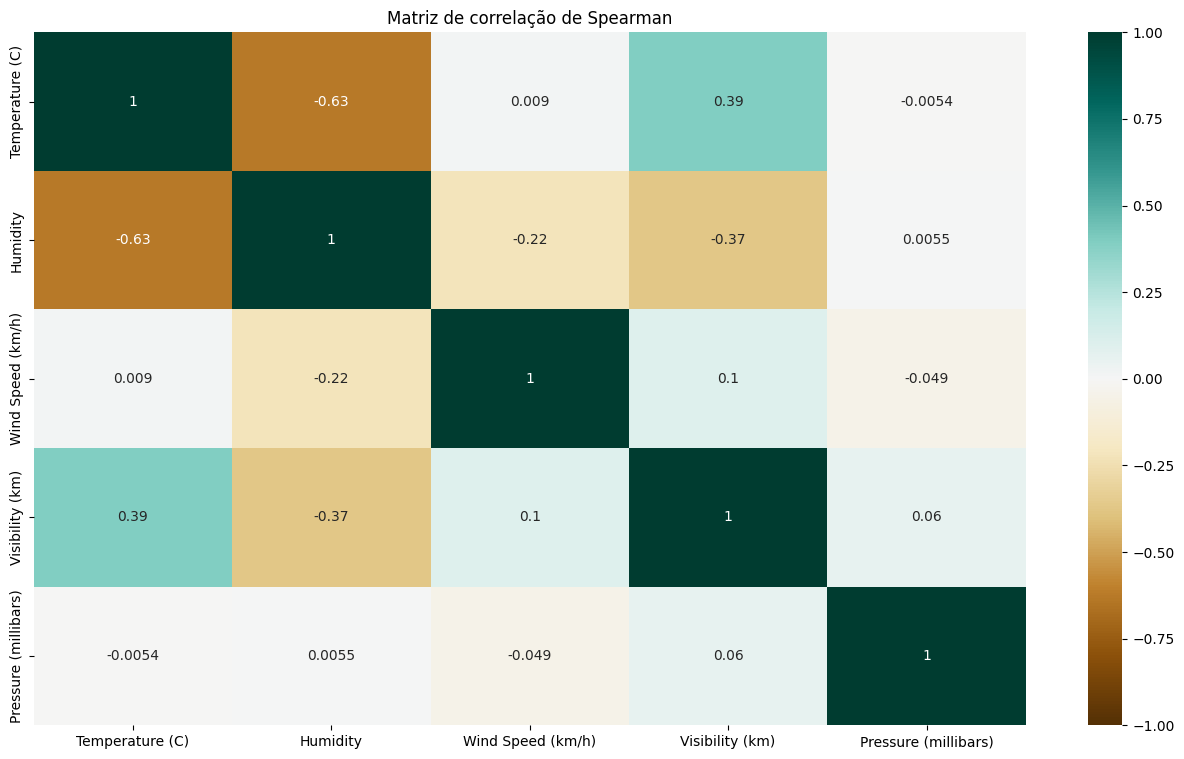

In [28]:
plt.figure(figsize = (16,9))

sns.heatmap(df_num_corr,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Spearman')

plt.show()

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

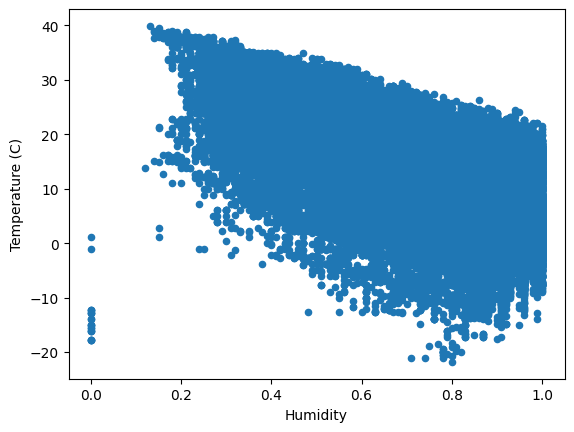

In [35]:
df_num.plot(kind='scatter',x='Humidity',y='Temperature (C)')

<Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>

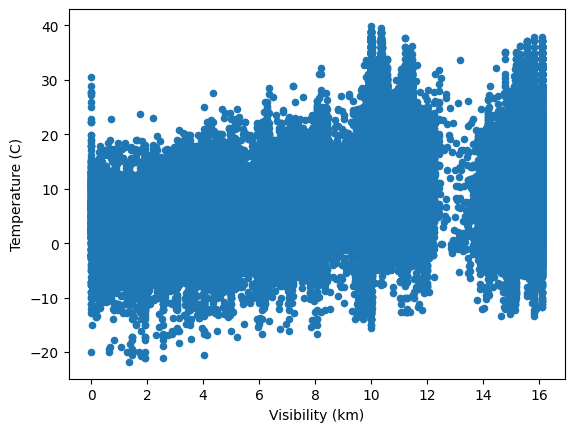

In [45]:
df_num.plot(kind='scatter',x='Visibility (km)',y='Temperature (C)')

### 4.0 - Criando modelo

4.1 - regressão linear

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_num[['Humidity']]
y = df_num[['Temperature (C)']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [34]:
X_train.tail()

,Humidity
9372,0.46
93553,0.90
50496,0.85
94735,0.82
83209,0.81


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
r2_training = lr.score(X_train,y_train)

In [40]:
r2_training

0.40127102336887166

In [41]:
yhat = lr.predict(X_test)

In [42]:
yhat[0:5]

array([[10.53331301],
       [11.15237099],
       [24.15258861],
       [16.72389282],
       [10.53331301]])

In [43]:
r2_test = lr.score(X_test,y_test)

In [44]:
r2_test

0.39614778569757203

4.2 - modelo regressão múltipla

In [49]:
Xm = df_num[['Humidity','Visibility (km)']]
ym = df_num[['Temperature (C)']]

In [50]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.30, random_state=10)

In [47]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [53]:
scaler.fit(Xm_train)

StandardScaler()

In [54]:
XmT_train = scaler.transform(Xm_train)

In [59]:
XmT_train

array([[-0.27871212,  1.32035374],
       [-0.02326309,  1.3741997 ],
       [ 0.43654517, -0.14117949],
       ...,
       [ 0.58981458, -1.27963696],
       [ 0.43654517, -0.35656334],
       [ 0.38545536,  1.3741997 ]])

In [55]:
lrm = LinearRegression()

In [56]:
lrm.fit(XmT_train,ym_train)

LinearRegression()

In [60]:
ymhat = lrm.predict(XmT_train)

In [61]:
from sklearn.metrics import r2_score

In [65]:
r2_score(ym_train,ymhat)

0.4301636575552641

In [62]:
r2m_training = lrm.score(XmT_train,ym_train)

In [64]:
r2m_training

0.4301636575552641

In [66]:
XmT_test = scaler.transform(Xm_test)

In [67]:
r2m_test = lrm.score(XmT_test,y_test)

In [68]:
r2m_test

0.42683553757638504

4.3 Criando novo Df

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

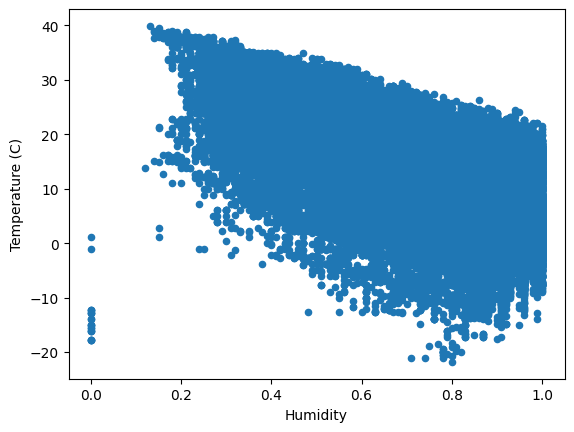

In [69]:
df_num.plot(kind='scatter',x='Humidity',y='Temperature (C)')

In [92]:
len(df_num['Humidity'].unique())

90

In [70]:
df_num_new = df_num.groupby('Humidity')['Temperature (C)'].mean()

In [75]:
df_num_new = pd.DataFrame(df_num_new).reset_index()
df_num_new

,Humidity,Temperature (C)
0,0.00,-13.560606
1,0.12,13.888889
2,0.13,39.905556
3,0.14,32.637500
4,0.15,25.514444
...,...,...
85,0.96,5.595618
86,0.97,13.613889
87,0.98,5.327339
88,0.99,4.650046


<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

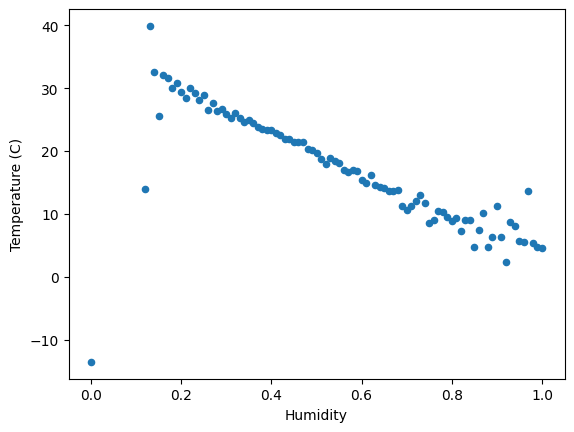

In [76]:
df_num_new.plot(kind='scatter',x='Humidity',y='Temperature (C)')

In [77]:
df_num_new.corr()

,Humidity,Temperature (C)
Humidity,1.00000,-0.78117
Temperature (C),-0.78117,1.00000


In [79]:
Xn = df_num_new[['Humidity']]
yn = df_num_new[['Temperature (C)']]

In [80]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30, random_state=10)

In [81]:
lrn = LinearRegression()

In [93]:
lrn.fit(Xn,yn)

LinearRegression()

In [94]:
lrn.score(Xn,yn)

0.6102259333157127

In [84]:
ynhat = lrn.predict(Xn_test)

In [85]:
ynhat

array([[ 9.12676249],
       [21.28250624],
       [26.87414836],
       [19.09447237],
       [22.98431036],
       [24.19988474],
       [18.60824262],
       [11.07168149],
       [18.36512774],
       [22.49808061],
       [12.77348562],
       [12.28725587],
       [15.93397899],
       [13.01660049],
       [ 7.66807324],
       [17.63578312],
       [13.25971537],
       [16.66332362],
       [18.12201287],
       [15.44774924],
       [26.14480374],
       [10.34233687],
       [13.98905999],
       [16.17709387],
       [ 7.18184349],
       [27.11726324],
       [14.23217487]])

In [86]:
r2n_test = lrn.score(Xn_test,yn_test)

In [87]:
r2n_test

0.8314761687511186